In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

from pandas.tseries.offsets import MonthEnd

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [28]:
cross = pd.read_csv('datasets/ret_mon_python2023.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['month'], format='%Y-%m-%d') + MonthEnd(1)
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross['w'] = 1
cross = cross.dropna(subset=['ret','totalvalue'])
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w
1,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1
2,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1
3,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1
4,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1
5,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1
752024,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1
752025,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1
752026,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1


# 导入个股日数据

In [41]:
ret_day = pd.read_csv('D:\\Academic\\academic\\Assetpricing\\Output\\ret_day2023.csv')
ret_day['month'] = pd.to_datetime(ret_day['Day'], format='%Y-%m-%d') + MonthEnd(1)
ret_day['Stkcd'] = ret_day['Stkcd'].apply(lambda x: '{:0>6}'.format(x))
ret_day


,Day,Stkcd,y,Q,month,Opnprc,Hiprc,Loprc,Clsprc,TradingVolume,TradingMoney,CirculationValue,TotalValue,Return_1,Return_2,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio,All_shares,A_float_shares,H_float_shares,Pre_shares,ratio,Freq,Freq_Q,Freq_y,yuemo,jimo,rfday,r
0,1990-12-19,600601,1990,1990 Q4,1990-12-31,185.30,185.30,185.30,185.30,200.0,37060.0,1.686230e+08,1.853000e+08,2.706000,2.706000,185.300000,185.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,2.705773
1,1990-12-19,600602,1990,1990 Q4,1990-12-31,365.70,384.00,365.70,384.00,1160.0,443610.0,1.885440e+08,7.680000e+08,2.840000,2.840000,384.000000,384.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,2000000.0,491000.0,0.0,0.0,0.245500,8,8,8,0,0,0.000227,2.839773
2,1990-12-19,600651,1990,1990 Q4,1990-12-31,320.30,320.30,320.30,320.30,2.0,640.6,1.056990e+07,1.056990e+07,3.575714,3.575714,320.300000,320.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,33000.0,33000.0,0.0,0.0,1.000000,8,8,8,0,0,0.000227,3.575487
3,1990-12-19,600656,1990,1990 Q4,1990-12-31,260.00,260.00,260.00,260.00,50.0,13000.0,1.170286e+08,6.412952e+08,1.600000,1.600000,260.000000,260.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,2466520.0,450110.0,0.0,0.0,0.182488,5,5,5,0,0,0.000227,1.599773
4,1990-12-20,600601,1990,1990 Q4,1990-12-31,185.30,194.60,185.30,194.60,84.0,16160.4,1.770860e+08,1.946000e+08,0.050189,0.050189,194.600000,194.600000,1,1990-12-19,1,NaN,NaN,185.30,0.050189,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,0.049962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13597254,2023-12-29,605580,2023,2023 Q4,2023-12-31,11.45,11.64,11.39,11.62,1443740.0,16718379.0,8.314575e+08,3.253600e+09,0.016623,0.016623,17.657419,16.267984,1,2023-05-09,1,0.0,0.0,11.43,0.016623,280000000.0,71554000.0,0.0,0.0,0.255550,21,60,242,1,1,0.000041,0.016582
13597255,2023-12-29,605588,2023,2023 Q4,2023-12-31,49.86,52.48,49.76,51.70,3720800.0,190601336.0,1.194247e+09,3.805604e+09,0.035242,0.035242,52.040380,51.699978,1,2023-09-28,1,0.0,0.0,49.94,0.035242,73609361.0,23099561.0,0.0,0.0,0.313813,21,60,242,1,1,0.000041,0.035201
13597256,2023-12-29,605589,2023,2023 Q4,2023-12-31,22.19,22.59,22.12,22.38,5546616.0,124004242.0,1.376844e+10,1.755256e+10,0.008562,0.008562,22.989587,22.379978,1,2023-11-24,1,0.0,0.0,22.19,0.008562,784296800.0,615211809.0,0.0,0.0,0.784412,21,60,242,1,1,0.000041,0.008521
13597257,2023-12-29,605598,2023,2023 Q4,2023-12-31,25.59,26.76,25.59,26.76,1463545.0,38250859.0,1.972235e+09,6.576560e+09,0.038014,0.038014,37.618983,37.463943,1,2023-08-17,1,0.0,0.0,25.78,0.038014,245760841.0,73700841.0,0.0,0.0,0.299888,21,60,242,1,1,0.000041,0.037973


# Amihud 2002

In [43]:
# 每个股票每个月 计算 r/TradingMoney*10^8 再求和
Amihud = ret_day.groupby(['Stkcd','month']).apply(lambda x: np.sum(np.abs(x['r'])/x['TradingMoney']*10**8),include_groups=False).to_frame()
Amihud.rename(columns={0:'Amihud'},inplace=True)
Amihud.reset_index()
Amihud


,Stkcd,month,Amihud
0,000001,1991-04-30,5155.981883
1,000001,1991-05-31,560.746281
2,000001,1991-06-30,916.567356
3,000001,1991-07-31,2003.272124
4,000001,1991-08-31,1198.375723
...,...,...,...
685718,605599,2023-08-31,0.625549
685719,605599,2023-09-30,0.518480
685720,605599,2023-10-31,0.696963
685721,605599,2023-11-30,0.750623


Amihud
Stkcd  month                  
000001 1991-04-30  5155.981883
       1991-05-31   560.746281
       1991-06-30   916.567356
       1991-07-31  2003.272124
       1991-08-31  1198.375723
...                        ...
605599 2023-08-31     0.625549
       2023-09-30     0.518480
       2023-10-31     0.696963
       2023-11-30     0.750623
       2023-12-31     1.205341

[685723 rows x 1 columns]

In [44]:
cross_amihud = pd.merge(cross,Amihud,on=['Stkcd','month'],how='left')
cross_amihud


,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,Amihud
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,560.746281
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,916.567356
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,2003.272124
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,1198.375723
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,5.574835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.625549
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.518480
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.696963
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.750623


In [46]:
fenweishu = pd.DataFrame(
    cross_amihud.groupby(['month'])['Amihud'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='Amihud')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-31,358.316419,500.176538,845.868095,1191.559651,1283.625712,1375.691772,1417.561033,1459.430294,1592.688760
1991-02-28,35.082785,43.371139,47.928717,113.804017,225.518987,427.820239,700.401703,1143.703385,2653.588157
1991-03-31,178.083932,427.071555,604.763215,754.992051,875.391864,956.889223,1049.694785,1315.613006,2344.080073
1991-04-30,292.565107,757.065133,1022.071356,1111.110570,1828.899863,2597.404851,3554.308190,5872.711968,7762.858740
1991-05-31,127.148485,131.253312,323.461523,560.746281,1348.785140,1911.353515,6405.691886,11574.351445,13961.236063
...,...,...,...,...,...,...,...,...,...
2023-08-31,0.122873,0.211894,0.293134,0.379863,0.474730,0.593816,0.736821,0.921425,1.260021
2023-09-30,0.103523,0.179842,0.255929,0.336734,0.424949,0.526385,0.645584,0.806646,1.038995
2023-10-31,0.090346,0.155328,0.222933,0.297016,0.386492,0.486072,0.610594,0.763128,0.998472


In [49]:
portfolio = pd.merge(cross_amihud,fenweishu,on='month')
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,Amihud,one,two,three,four,five,six,seven,eight,nine
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,560.746281,127.148485,131.253312,323.461523,560.746281,1348.785140,1911.353515,6405.691886,11574.351445,13961.236063
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,916.567356,502.353275,562.796414,567.654689,916.567356,2013.885153,4328.203395,5082.931483,8733.683181,12828.370220
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,2003.272124,124.163790,176.949176,258.615663,341.040781,634.002864,1065.251759,1404.231026,1500.051425,1953.116077
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,1198.375723,57.417758,102.996194,192.830062,304.779922,1145.983588,1366.833796,2304.812619,3610.880401,20766.002999
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,5.574835,16.151473,37.007731,58.892912,73.010245,548.547891,1218.948398,1387.928368,2075.234303,3006.171775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.625549,0.122873,0.211894,0.293134,0.379863,0.474730,0.593816,0.736821,0.921425,1.260021
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.518480,0.103523,0.179842,0.255929,0.336734,0.424949,0.526385,0.645584,0.806646,1.038995
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.696963,0.090346,0.155328,0.222933,0.297016,0.386492,0.486072,0.610594,0.763128,0.998472
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.750623,0.089619,0.149634,0.210021,0.267022,0.331537,0.404599,0.489776,0.611142,0.810527


In [50]:
# 使用np.select替代多重np.where
conditions = [
    portfolio['Amihud'] <= portfolio['one'],
    portfolio['Amihud'] <= portfolio['two'],
    portfolio['Amihud'] <= portfolio['three'],
    portfolio['Amihud'] <= portfolio['four'], 
    portfolio['Amihud'] <= portfolio['five'],
    portfolio['Amihud'] <= portfolio['six'],
    portfolio['Amihud'] <= portfolio['seven'],
    portfolio['Amihud'] <= portfolio['eight'],
    portfolio['Amihud'] <= portfolio['nine']
]

choices = ['P1','P2','P3','P4','P5','P6','P7','P8','P9']

portfolio['sort'] = np.select(conditions, choices, default='Pmax')
portfolio = portfolio.dropna(subset=['totalvalue','next_ret'])
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,Amihud,one,two,three,four,five,six,seven,eight,nine,sort
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,560.746281,127.148485,131.253312,323.461523,560.746281,1348.785140,1911.353515,6405.691886,11574.351445,13961.236063,P4
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,916.567356,502.353275,562.796414,567.654689,916.567356,2013.885153,4328.203395,5082.931483,8733.683181,12828.370220,P4
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,2003.272124,124.163790,176.949176,258.615663,341.040781,634.002864,1065.251759,1404.231026,1500.051425,1953.116077,Pmax
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,1198.375723,57.417758,102.996194,192.830062,304.779922,1145.983588,1366.833796,2304.812619,3610.880401,20766.002999,P6
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,5.574835,16.151473,37.007731,58.892912,73.010245,548.547891,1218.948398,1387.928368,2075.234303,3006.171775,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709877,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,0.404972,0.096930,0.162854,0.225675,0.291210,0.357021,0.443378,0.550513,0.698876,0.919668,P6
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.625549,0.122873,0.211894,0.293134,0.379863,0.474730,0.593816,0.736821,0.921425,1.260021,P7
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.518480,0.103523,0.179842,0.255929,0.336734,0.424949,0.526385,0.645584,0.806646,1.038995,P6
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.696963,0.090346,0.155328,0.222933,0.297016,0.386492,0.486072,0.610594,0.763128,0.998472,P8


In [64]:
portfolio_amihud =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['w']),include_groups=False))
portfolio_amihud

0
month      sort          
1991-01-31 P1    0.010496
           P2    0.038284
           P4    0.081305
           P6    0.028134
           P8   -0.002070
...                   ...
2023-11-30 P6   -0.025848
           P7   -0.016765
           P8   -0.013193
           P9   -0.004046
           Pmax -0.014665

[3946 rows x 1 columns]

In [65]:
portfolio_amihud = portfolio_amihud.reset_index()
# portfolio_amihud.rename(columns={0:'p'},inplace=True)
portfolio_amihud['month'] = portfolio_amihud['month'] + MonthEnd(1)
portfolio_amihud.rename(columns={0:'p'},inplace=True)
portfolio_amihud

,month,sort,p
0,1991-02-28,P1,0.010496
1,1991-02-28,P2,0.038284
2,1991-02-28,P4,0.081305
3,1991-02-28,P6,0.028134
4,1991-02-28,P8,-0.002070
...,...,...,...
3941,2023-12-31,P6,-0.025848
3942,2023-12-31,P7,-0.016765
3943,2023-12-31,P8,-0.013193
3944,2023-12-31,P9,-0.004046


In [66]:
portfolio_amihud = portfolio_amihud.pivot_table(index='month',
                                            columns='sort',
                                            values='p')
portfolio_amihud['My_portfolio'] = portfolio_amihud['Pmax'] - portfolio_amihud['P1']
portfolio_amihud

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-02-28,0.010496,0.038284,NaN,0.081305,NaN,0.028134,NaN,-0.002070,NaN,-0.041567,-0.052063
1991-03-31,-0.133504,0.023904,-0.133293,-0.125264,-0.044343,-0.133253,-0.070455,-0.069140,-0.059149,0.070941,0.204445
1991-04-30,-0.077512,-0.122736,0.120035,-0.000595,0.070484,-0.123391,-0.097744,-0.103582,-0.133193,0.087227,0.164739
1991-05-31,-0.031989,0.055289,-0.036993,-0.129118,0.080639,-0.006657,-0.120582,0.238572,0.202117,-0.130814,-0.098825
1991-06-30,-0.048358,0.190006,-0.115097,-0.119551,-0.460637,0.190283,0.177858,0.201980,0.166237,0.184748,0.233106
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.065901,-0.056939,-0.048193,-0.056363,-0.048582,-0.049339,-0.038163,-0.036277,-0.022156,-0.012269,0.053632
2023-09-30,-0.017546,-0.016281,-0.008651,-0.007175,-0.004056,0.004608,0.006303,0.005648,0.010190,0.018104,0.035650
2023-10-31,-0.033581,-0.018841,-0.019723,-0.016551,-0.009891,-0.003714,-0.004528,0.004943,-0.005430,-0.004101,0.029480


In [67]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_amihud['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        14:34:01   Log-Likelihood:                 393.90
No. Observations:                 288   AIC:                            -785.8
Df Residuals:                     287   BIC:                            -782.1
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0174      0.003      4.990      0.0

In [68]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [82]:
MYPOR = portfolio_amihud[['P1','Pmax','My_portfolio']].copy()
MYPOR = MYPOR['2000-01':'2023-12']
MYPOR = pd.merge(MYPOR,Month_data[['Raw_return']],on='month',how='left')
MYPOR

,P1,Pmax,My_portfolio,Raw_return
month,,,,
2000-01-31,0.247076,0.080281,-0.166795,0.123242
2000-02-29,0.109076,0.148575,0.039499,0.116990
2000-03-31,0.021503,0.177467,0.155964,0.049948
2000-04-30,-0.002192,0.017334,0.019526,0.020053
2000-05-31,0.028932,0.036915,0.007982,0.031710
...,...,...,...,...
2023-08-31,-0.065901,-0.012269,0.053632,-0.052009
2023-09-30,-0.017546,0.018104,0.035650,-0.003013
2023-10-31,-0.033581,-0.004101,0.029480,-0.029483


In [83]:
model_port = smf.ols('My_portfolio ~ Raw_return',
                 data=MYPOR['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.496
Date:                Mon, 16 Dec 2024   Prob (F-statistic):             0.0626
Time:                        14:38:56   Log-Likelihood:                 396.47
No. Observations:                 288   AIC:                            -788.9
Df Residuals:                     286   BIC:                            -781.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0180      0.003      5.198      0.0

In [84]:
# 计算投资组合的Sharpe Ratio
sharpe_ratio = MYPOR['My_portfolio'].mean() / MYPOR['My_portfolio'].std() * np.sqrt(12)
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.9750008989307114


In [85]:
# 还原投资策略的价格
MYPOR['price_portfolio'] = (1 + MYPOR['My_portfolio']).cumprod()
MYPOR['price_p1'] = (1 + MYPOR['P1']).cumprod()
MYPOR['price_pmax'] = (1 + MYPOR['Pmax']).cumprod()
MYPOR['price_market'] = (1 + MYPOR['Raw_return']).cumprod()
MYPOR

,P1,Pmax,My_portfolio,Raw_return,price_portfolio,price_p1,price_pmax,price_market
month,,,,,,,,
2000-01-31,0.247076,0.080281,-0.166795,0.123242,0.833205,1.247076,1.080281,1.123242
2000-02-29,0.109076,0.148575,0.039499,0.116990,0.866116,1.383102,1.240783,1.254650
2000-03-31,0.021503,0.177467,0.155964,0.049948,1.001199,1.412843,1.460982,1.317318
2000-04-30,-0.002192,0.017334,0.019526,0.020053,1.020748,1.409746,1.486306,1.343734
2000-05-31,0.028932,0.036915,0.007982,0.031710,1.028896,1.450533,1.541172,1.386344
...,...,...,...,...,...,...,...,...
2023-08-31,-0.065901,-0.012269,0.053632,-0.052009,73.883893,0.685898,62.813674,2.282984
2023-09-30,-0.017546,0.018104,0.035650,-0.003013,76.517860,0.673863,63.950850,2.276105
2023-10-31,-0.033581,-0.004101,0.029480,-0.029483,78.773569,0.651234,63.688575,2.208999


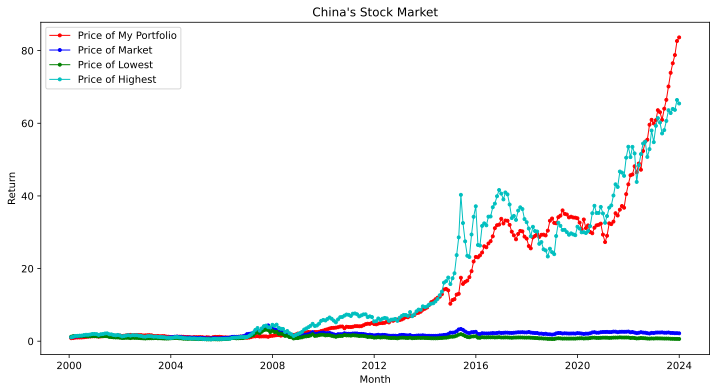

In [86]:
fig = plt.figure(figsize=(12, 6))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPOR)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPOR) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPOR) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPOR) 
plt.legend() # 显示图例
fig = plt.gcf()
plt.show();

In [87]:
# 计算累积收益率
MYPOR['cumulative_return'] = (1 + MYPOR['My_portfolio']).cumprod()

# 计算滚动最大值
MYPOR['rolling_max'] = MYPOR['cumulative_return'].cummax()

# 计算回撤
MYPOR['drawdown'] = MYPOR['cumulative_return'] / MYPOR['rolling_max'] - 1

# 计算最大回撤
max_drawdown = MYPOR['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: -0.4964904738425917


In [88]:
# 找出最大回撤的时间
max_drawdown_end = MYPOR['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = MYPOR.loc[:max_drawdown_end, 'cumulative_return'].idxmax() # 这部分代码选择了从数据开始到 max_drawdown_end 时间点之间的所有累积收益率

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.4964904738425917
Maximum Drawdown Start Date: 2002-05-31 00:00:00
Maximum Drawdown End Date: 2006-04-30 00:00:00


# Maximum Daily Return

In [90]:
maximum_daily_return = ret_day.groupby(['Stkcd','month']).apply(lambda x: x['r'].max(),include_groups=False).to_frame()
maximum_daily_return.reset_index(inplace=True)
maximum_daily_return.rename(columns={0:'maximum_daily_return'},inplace=True)
maximum_daily_return

,Stkcd,month,maximum_daily_return
0,000001,1991-04-30,0.224773
1,000001,1991-05-31,-0.005083
2,000001,1991-06-30,0.004756
3,000001,1991-07-31,-0.005053
4,000001,1991-08-31,0.152696
...,...,...,...
685718,605599,2023-08-31,0.064099
685719,605599,2023-09-30,0.061137
685720,605599,2023-10-31,0.067920
685721,605599,2023-11-30,0.033466


In [111]:
cross_maximum_daily_return = pd.merge(cross,maximum_daily_return,on=['Stkcd','month'],how='left')
cross_maximum_daily_return = cross_maximum_daily_return[(cross_maximum_daily_return['Rank'] > 6) & (cross_maximum_daily_return['price'] > 5) & (cross_maximum_daily_return['Freq'] > 7)].copy()
cross_maximum_daily_return

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,maximum_daily_return
5,000001,1991-10-31,26.90,7,25.0,1.210202e+09,2.414319e+09,20.914053,21.604683,0.855172,0.006092,0.849080,0.016213,1,0.240380
6,000001,1991-11-30,27.50,8,25.0,1.237195e+09,2.468170e+09,20.936113,21.626743,0.022305,0.006092,0.016213,0.061181,1,0.109707
7,000001,1991-12-31,29.35,9,26.0,1.320425e+09,2.634211e+09,21.001219,21.691849,0.067273,0.006092,0.061181,0.055237,1,0.046011
8,000001,1992-01-31,31.15,10,22.0,1.401405e+09,2.795764e+09,21.060741,21.751371,0.061329,0.006092,0.055237,0.006749,1,0.022369
9,000001,1992-02-29,31.55,11,16.0,1.419400e+09,2.831664e+09,21.073500,21.764130,0.012841,0.006092,0.006749,0.239957,1,0.031257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.064099
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.061137
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.067920
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.033466


In [112]:
fenweishu = pd.DataFrame(
    cross_maximum_daily_return.groupby(['month'])['maximum_daily_return'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='maximum_daily_return')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu


,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-06-30,0.009899,0.009910,0.009911,0.009912,0.009914,0.009917,0.009917,0.009918,0.010378
1991-07-31,0.006767,0.009873,0.009885,0.009890,0.009892,0.009920,0.010384,0.010758,0.069066
1991-08-31,0.009862,0.009870,0.009878,0.009879,0.010072,0.010316,0.010495,0.010610,0.085409
1991-09-30,0.009755,0.009859,0.009866,0.009870,0.009872,0.010144,0.010326,0.010326,0.010397
1991-10-31,0.009844,0.009863,0.009873,0.010168,0.010282,0.010438,0.010569,0.220853,0.240380
...,...,...,...,...,...,...,...,...,...
2023-08-31,0.023511,0.029520,0.034409,0.039527,0.044875,0.051463,0.059839,0.072293,0.099930
2023-09-30,0.019241,0.023360,0.027133,0.030844,0.034654,0.040109,0.047454,0.059814,0.099211
2023-10-31,0.022366,0.027913,0.032450,0.036928,0.041723,0.048015,0.056373,0.069008,0.099959


In [113]:
portfolio = pd.merge(cross_maximum_daily_return,fenweishu,on='month',how='left')
portfolio


,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,maximum_daily_return,one,two,three,four,five,six,seven,eight,nine
0,000001,1991-10-31,26.90,7,25.0,1.210202e+09,2.414319e+09,20.914053,21.604683,0.855172,0.006092,0.849080,0.016213,1,0.240380,0.009844,0.009863,0.009873,0.010168,0.010282,0.010438,0.010569,0.220853,0.240380
1,000001,1991-11-30,27.50,8,25.0,1.237195e+09,2.468170e+09,20.936113,21.626743,0.022305,0.006092,0.016213,0.061181,1,0.109707,0.009851,0.009858,0.010094,0.010208,0.010271,0.010396,0.032232,0.109707,0.137452
2,000001,1991-12-31,29.35,9,26.0,1.320425e+09,2.634211e+09,21.001219,21.691849,0.067273,0.006092,0.061181,0.055237,1,0.046011,0.009829,0.009845,0.009913,0.010090,0.010191,0.010316,0.035320,0.062824,0.107458
3,000001,1992-01-31,31.15,10,22.0,1.401405e+09,2.795764e+09,21.060741,21.751371,0.061329,0.006092,0.055237,0.006749,1,0.022369,0.009825,0.009831,0.009974,0.010084,0.010200,0.012221,0.020458,0.021999,0.033013
4,000001,1992-02-29,31.55,11,16.0,1.419400e+09,2.831664e+09,21.073500,21.764130,0.012841,0.006092,0.006749,0.239957,1,0.031257,0.009824,0.009917,0.010053,0.010119,0.031190,0.031358,0.035194,0.044068,0.381668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572418,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.064099,0.023511,0.029520,0.034409,0.039527,0.044875,0.051463,0.059839,0.072293,0.099930
572419,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.061137,0.019241,0.023360,0.027133,0.030844,0.034654,0.040109,0.047454,0.059814,0.099211
572420,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.067920,0.022366,0.027913,0.032450,0.036928,0.041723,0.048015,0.056373,0.069008,0.099959
572421,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.033466,0.016216,0.021023,0.025421,0.029874,0.035997,0.043225,0.053656,0.072040,0.099959


In [114]:
# 使用np.select替代多重np.where
conditions = [
    portfolio['maximum_daily_return'] <= portfolio['one'],
    portfolio['maximum_daily_return'] <= portfolio['two'],
    portfolio['maximum_daily_return'] <= portfolio['three'],
    portfolio['maximum_daily_return'] <= portfolio['four'], 
    portfolio['maximum_daily_return'] <= portfolio['five'],
    portfolio['maximum_daily_return'] <= portfolio['six'],
    portfolio['maximum_daily_return'] <= portfolio['seven'],
    portfolio['maximum_daily_return'] <= portfolio['eight'],
    portfolio['maximum_daily_return'] <= portfolio['nine']
]

choices = ['P1','P2','P3','P4','P5','P6','P7','P8','P9']

portfolio['sort'] = np.select(conditions, choices, default='Pmax')
portfolio = portfolio.dropna(subset=['totalvalue','next_ret'])

portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,maximum_daily_return,one,two,three,four,five,six,seven,eight,nine,sort
0,000001,1991-10-31,26.90,7,25.0,1.210202e+09,2.414319e+09,20.914053,21.604683,0.855172,0.006092,0.849080,0.016213,1,0.240380,0.009844,0.009863,0.009873,0.010168,0.010282,0.010438,0.010569,0.220853,0.240380,P9
1,000001,1991-11-30,27.50,8,25.0,1.237195e+09,2.468170e+09,20.936113,21.626743,0.022305,0.006092,0.016213,0.061181,1,0.109707,0.009851,0.009858,0.010094,0.010208,0.010271,0.010396,0.032232,0.109707,0.137452,P8
2,000001,1991-12-31,29.35,9,26.0,1.320425e+09,2.634211e+09,21.001219,21.691849,0.067273,0.006092,0.061181,0.055237,1,0.046011,0.009829,0.009845,0.009913,0.010090,0.010191,0.010316,0.035320,0.062824,0.107458,P8
3,000001,1992-01-31,31.15,10,22.0,1.401405e+09,2.795764e+09,21.060741,21.751371,0.061329,0.006092,0.055237,0.006749,1,0.022369,0.009825,0.009831,0.009974,0.010084,0.010200,0.012221,0.020458,0.021999,0.033013,P9
4,000001,1992-02-29,31.55,11,16.0,1.419400e+09,2.831664e+09,21.073500,21.764130,0.012841,0.006092,0.006749,0.239957,1,0.031257,0.009824,0.009917,0.010053,0.010119,0.031190,0.031358,0.035194,0.044068,0.381668,P6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572417,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,0.031987,0.018347,0.022584,0.027265,0.031994,0.038145,0.046137,0.056486,0.071388,0.099959,P4
572418,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.064099,0.023511,0.029520,0.034409,0.039527,0.044875,0.051463,0.059839,0.072293,0.099930,P8
572419,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.061137,0.019241,0.023360,0.027133,0.030844,0.034654,0.040109,0.047454,0.059814,0.099211,P9
572420,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.067920,0.022366,0.027913,0.032450,0.036928,0.041723,0.048015,0.056373,0.069008,0.099959,P8


In [116]:
portfolio_maximum_daily_return = pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['totalvalue']),include_groups=False))
portfolio_maximum_daily_return = portfolio_maximum_daily_return.reset_index()
portfolio_maximum_daily_return['month'] = portfolio_maximum_daily_return['month'] + MonthEnd(1)
portfolio_maximum_daily_return.rename(columns={0:'p'},inplace=True)
portfolio_maximum_daily_return


,month,sort,p
0,1991-07-31,P1,0.250962
1,1991-07-31,P2,-0.029950
2,1991-07-31,P4,0.178576
3,1991-07-31,P6,0.225889
4,1991-07-31,P8,0.082292
...,...,...,...
3872,2023-12-31,P6,-0.005942
3873,2023-12-31,P7,-0.025421
3874,2023-12-31,P8,-0.034170
3875,2023-12-31,P9,-0.026296


In [117]:
portfolio_maximum_daily_return = portfolio_maximum_daily_return.pivot_table(index='month',columns='sort',values='p')
portfolio_maximum_daily_return['My_portfolio'] = portfolio_maximum_daily_return['P1'] - portfolio_maximum_daily_return['Pmax']
portfolio_maximum_daily_return

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-07-31,0.250962,-0.029950,NaN,0.178576,NaN,0.225889,NaN,0.082292,NaN,0.045190,0.205772
1991-08-31,-0.164971,-0.047111,0.226351,0.238320,0.238774,NaN,-0.147268,0.214380,0.237810,0.018298,-0.183269
1991-09-30,0.226310,0.154402,-0.074564,NaN,-0.051753,0.190075,NaN,0.190037,-0.010994,-0.260060,0.486370
1991-10-31,0.176174,0.202068,NaN,0.118699,0.214137,NaN,0.209703,NaN,NaN,0.156142,0.020032
1991-11-30,0.160802,0.172135,0.189958,0.225559,0.177858,0.143794,0.142519,0.167821,0.016213,-0.000175,0.160977
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.041704,-0.054543,-0.051223,-0.061438,-0.050953,-0.071983,-0.063527,-0.051409,-0.069013,-0.046582,0.004878
2023-09-30,0.008916,-0.008411,-0.005730,-0.030019,-0.009675,-0.015461,-0.012199,-0.014786,-0.014388,-0.038730,0.047646
2023-10-31,-0.027336,-0.019327,-0.056291,-0.040611,-0.039047,-0.017710,-0.015552,-0.016090,-0.045065,-0.005093,-0.022243


In [118]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_maximum_daily_return['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())



                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        15:02:29   Log-Likelihood:                 391.69
No. Observations:                 288   AIC:                            -781.4
Df Residuals:                     287   BIC:                            -777.7
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0072      0.003      2.242      0.0

In [119]:
MYPOR = portfolio_maximum_daily_return[['P1','Pmax','My_portfolio']].copy()
MYPOR = MYPOR['2000-01':'2023-12']
MYPOR = pd.merge(MYPOR,Month_data[['Raw_return']],on='month',how='left')
MYPOR
model_port = smf.ols('My_portfolio ~ Raw_return',
                 data=MYPOR['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())


,P1,Pmax,My_portfolio,Raw_return
month,,,,
2000-01-31,0.095223,0.194948,-0.099725,0.123242
2000-02-29,0.104835,0.144783,-0.039948,0.116990
2000-03-31,0.114529,0.083901,0.030629,0.049948
2000-04-30,0.042570,-0.009768,0.052338,0.020053
2000-05-31,0.008443,0.002035,0.006409,0.031710
...,...,...,...,...
2023-08-31,-0.041704,-0.046582,0.004878,-0.052009
2023-09-30,0.008916,-0.038730,0.047646,-0.003013
2023-10-31,-0.027336,-0.005093,-0.022243,-0.029483


                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     27.36
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.27e-07
Time:                        15:03:02   Log-Likelihood:                 406.19
No. Observations:                 288   AIC:                            -808.4
Df Residuals:                     286   BIC:                            -801.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0086      0.003      2.841      0.0

In [120]:
sharpe_ratio = MYPOR['My_portfolio'].mean() / MYPOR['My_portfolio'].std() * np.sqrt(12)
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 0.40002707931855297


In [121]:
MYPOR['price_portfolio'] = (1 + MYPOR['My_portfolio']).cumprod()
MYPOR['price_p1'] = (1 + MYPOR['P1']).cumprod()
MYPOR['price_pmax'] = (1 + MYPOR['Pmax']).cumprod()
MYPOR['price_market'] = (1 + MYPOR['Raw_return']).cumprod()
MYPOR



,P1,Pmax,My_portfolio,Raw_return,price_portfolio,price_p1,price_pmax,price_market
month,,,,,,,,
2000-01-31,0.095223,0.194948,-0.099725,0.123242,0.900275,1.095223,1.194948,1.123242
2000-02-29,0.104835,0.144783,-0.039948,0.116990,0.864311,1.210041,1.367956,1.254650
2000-03-31,0.114529,0.083901,0.030629,0.049948,0.890784,1.348626,1.482728,1.317318
2000-04-30,0.042570,-0.009768,0.052338,0.020053,0.937406,1.406037,1.468246,1.343734
2000-05-31,0.008443,0.002035,0.006409,0.031710,0.943413,1.417909,1.471233,1.386344
...,...,...,...,...,...,...,...,...
2023-08-31,-0.041704,-0.046582,0.004878,-0.052009,4.264773,2.856786,0.220453,2.282984
2023-09-30,0.008916,-0.038730,0.047646,-0.003013,4.467972,2.882258,0.211915,2.276105
2023-10-31,-0.027336,-0.005093,-0.022243,-0.029483,4.368591,2.803469,0.210836,2.208999


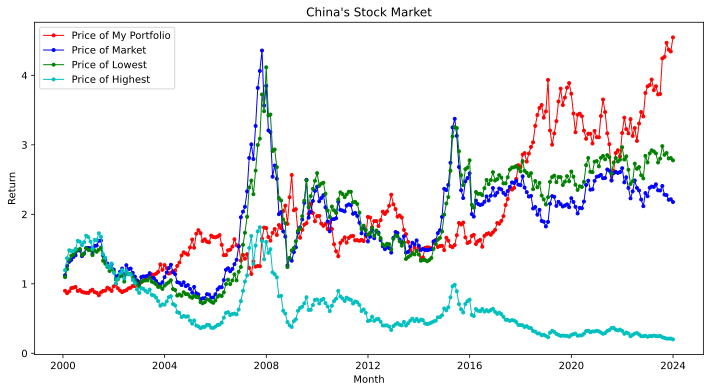

In [122]:
fig = plt.figure(figsize=(12, 6))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPOR)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPOR)


plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPOR) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPOR) 

plt.legend() # 显示图例
fig = plt.gcf()
plt.show();


In [124]:
# 计算累积收益率
MYPOR['cumulative_return'] = (1 + MYPOR['My_portfolio']).cumprod()

# 计算滚动最大值
MYPOR['rolling_max'] = MYPOR['cumulative_return'].cummax()

# 计算回撤
MYPOR['drawdown'] = MYPOR['cumulative_return'] / MYPOR['rolling_max'] - 1

# 计算最大回撤
max_drawdown = MYPOR['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: -0.47554078355311746


In [125]:
# 找出最大回撤的时间
max_drawdown_end = MYPOR['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = MYPOR.loc[:max_drawdown_end, 'cumulative_return'].idxmax() # 这部分代码选择了从数据开始到 max_drawdown_end 时间点之间的所有累积收益率

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.47554078355311746
Maximum Drawdown Start Date: 2008-12-31 00:00:00
Maximum Drawdown End Date: 2014-01-31 00:00:00
